In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
def welcome():
    print("Welcome to Salary Prediction System")
    print("Press ENTER key to proceed")
    input()

In [3]:
def checkcsv():
    csv_files=[]
    cur_dir=os.getcwd()
    content_list=os.listdir(cur_dir)
    for x in content_list:
        if x.split('.')[-1]=='csv':
            csv_files.append(x)
    if len(csv_files)==0:
        return 'No csv file in the directory'
    else:
        return csv_files
    

In [4]:
def display_and_select_csv(csv_files):
    i=0
    for file_name in csv_files:
        print(i,'...',file_name)
        i+=1
    return csv_files[int(input("Select file to create ML model"))]

In [5]:
def graph(X_train,Y_train,regressionObject,X_test,Y_test,Y_pred):
    plt.scatter(X_train,Y_train,color='red',label='training data')
    plt.plot(X_train,regressionObject.predict(X_train),color='blue',label='Best Fit')
    plt.scatter(X_test,Y_test,color='green',label='test data')
    plt.scatter(X_test,Y_pred,color='black',label='Pred test data')
    plt.title("Salary vs Experience")
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

Welcome to Salary Prediction System
Press ENTER key to proceed

0 ... famous-people.csv
1 ... gama.csv
2 ... housing.csv
3 ... mercedesbenz.csv
4 ... salary.csv
5 ... test.csv
6 ... USA_Housing.csv
Select file to create ML model4
salary.csv is selected
Reading csv file
Creating Dataset
Dataset created

Enter test data size (between 0 and 1)
.3
Model creation in progression
Model is created
Press ENTER key to predict test data in trained model

 Expe.    Salary        Predicted salary
[2.] ... 43525.0 ... 44926.342260263016
[9.6] ... 112635.0 ... 114326.47315693008
[6.8] ... 91738.0 ... 88758.00387921064
[4.1] ... 57081.0 ... 64102.6942185526
[9.5] ... 116969.0 ... 113413.31353986867
[6.] ... 93940.0 ... 81452.72694271937
[3.9] ... 63218.0 ... 62276.374984429785
[8.2] ... 113812.0 ... 101542.23851807036
[7.9] ... 101302.0 ... 98802.75966688614

Press ENTER key to see above result in graphical format



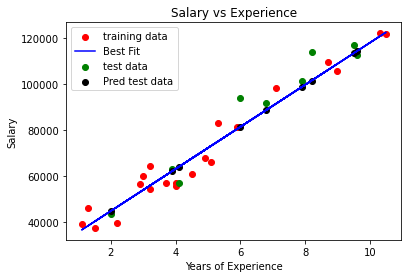


Our model is 93.39% accurate


Now you can predict salary of an employee using our model

Enter experience in years of the candidates, separated by comma
3,4,5,6


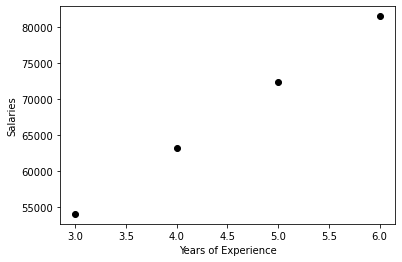

   Experience      Salaries
0         3.0  54057.938431
1         4.0  63189.534601
2         5.0  72321.130772
3         6.0  81452.726943



In [6]:

def main():
    welcome()
    try:
        csv_files=checkcsv()
        if csv_files=='No csv file in the directory':
            raise FileNotFoundError('No csv file in the directory')
        csv_file=display_and_select_csv(csv_files)
        print(csv_file,'is selected')
        print('Reading csv file')
        print('Creating Dataset')
        dataset=pd.read_csv(csv_file)
        print('Dataset created')
        X=dataset.iloc[:,:-1].values
        Y=dataset.iloc[:,-1].values
        s=float(input("\nEnter test data size (between 0 and 1)\n") )
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=s)
        print("Model creation in progression")
        regressionObject=LinearRegression()
        regressionObject.fit(X_train,Y_train)
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()

        Y_pred=regressionObject.predict(X_test)
        i=0
        print(' Expe.    Salary        Predicted salary')
        while i<len(X_test):
            print(X_test[i],'...',Y_test[i],'...',Y_pred[i])
            i+=1
        print("\nPress ENTER key to see above result in graphical format")
        input()
        graph(X_train,Y_train, regressionObject, X_test, Y_test, Y_pred)
        r2=r2_score(Y_test,Y_pred)
        print("\nOur model is %2.2f%% accurate" %(r2*100))

        print("\n\nNow you can predict salary of an employee using our model")
        print("\nEnter experience in years of the candidates, separated by comma")

        exp=[float(e) for e in input().split(',')]
        ex=[]
        for x in exp:
            ex.append([x])
        experience =np.array(ex)
        salaries=regressionObject.predict(experience)

        plt.scatter(experience,salaries,color='black')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salaries')
        plt.show()

        d=pd.DataFrame({'Experience':exp,'Salaries':salaries})
        print(d)
        
    except FileNotFoundError:
        print('No csv file in the directory')
        print("Press ENTER key to exit")
        input()
        exit()

if __name__=="__main__":
    main()
    input()
